### source: 
https://machinelearningmastery.com/calculate-the-bias-variance-trade-off/
I can recommend this site!

### extended by: 
<a href=https://github.com/morkapronczay>morkapronczay</a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mlxtend.evaluate import bias_variance_decomp

# GET DATA

In [2]:
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
df = pd.read_csv(url, header=None)

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
# separate into inputs and outputs
data = df.values
X, y = data[:, :-1], data[:, -1]
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# BIAS-VARIANCE DECOMPOSITION

<a href=https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff>Decomposition details</a>

## LINREG

In [5]:
# define the model
model = LinearRegression()
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 22.418
Bias: 20.744
Variance: 1.674


## DECISION TREE

In [6]:
# save decision tree parameters
decision_tree_params = {"max_depth": 10}

In [7]:
# define the model
model = DecisionTreeRegressor(**decision_tree_params)
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 25.205
Bias: 9.813
Variance: 15.392


## RANDOM FOREST

In [8]:
# define the model
model = RandomForestRegressor(**decision_tree_params, n_estimators=20)
# estimate bias and variance
mse, bias, var = bias_variance_decomp(model, X_train, y_train, X_test, y_test, loss='mse', num_rounds=200, random_seed=1)
# summarize results
print('MSE: %.3f' % mse)
print('Bias: %.3f' % bias)
print('Variance: %.3f' % var)

MSE: 13.864
Bias: 10.352
Variance: 3.512


# VISUALIZE TRADEOFF

## DECISION TREE

In [9]:
# define the model
mse = {}
bias = {}
var = {}
for i in [0.0025 * f for f in range(1, 21)]:
    model = DecisionTreeRegressor(min_samples_leaf = i)
    # estimate bias and variance
    mse[i], bias[i], var[i] = bias_variance_decomp(model, X_train, y_train, X_test, y_test,
                                                   loss='mse', num_rounds=200, random_seed=1)

In [10]:
df = pd.DataFrame.from_dict(mse, orient='index')
df.columns = ['mse']
df['bias'] = df.index.map(bias)
df['variance'] = df.index.map(var)

In [11]:
df.head()

,mse,bias,variance
0.0025,25.537290,9.754571,15.782719
0.0050,24.034409,9.743413,14.290997
0.0075,23.925922,10.225459,13.700462
0.0100,23.618737,10.783786,12.834951
0.0125,23.878246,11.526410,12.351837


<AxesSubplot:>

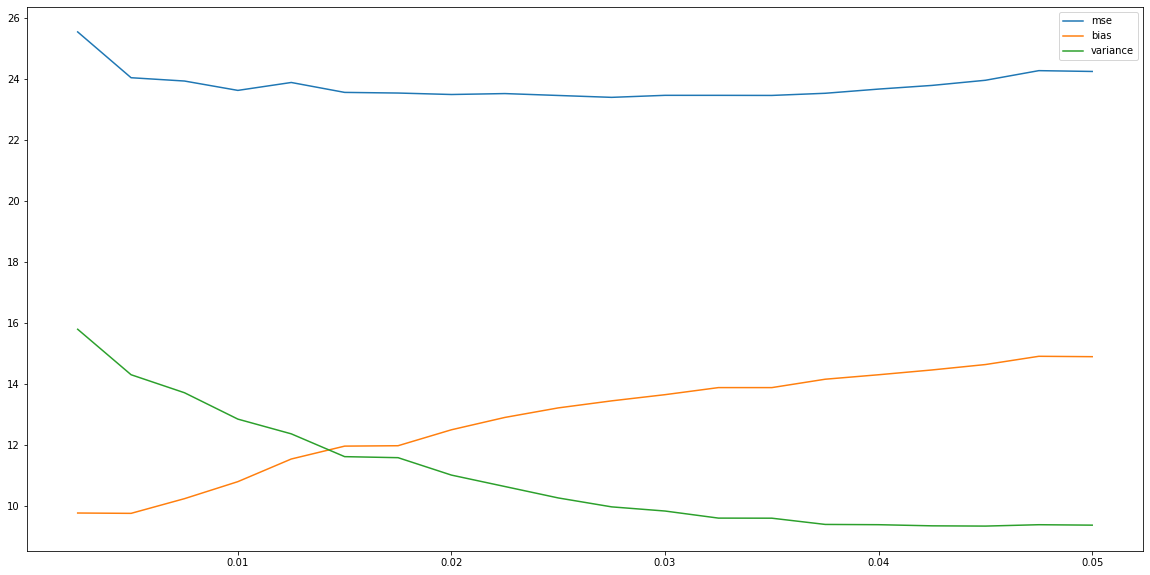

In [12]:
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(ax=ax)

## RANDOM FOREST

In [13]:
# define the model
mse = {}
bias = {}
var = {}
for i in [0.0025 * f for f in range(1, 21)]:
    model = RandomForestRegressor(min_samples_leaf = i, n_estimators=20)
    # estimate bias and variance
    mse[i], bias[i], var[i] = bias_variance_decomp(model, X_train, y_train, X_test, y_test,
                                                   loss='mse', num_rounds=200, random_seed=1)

In [14]:
df = pd.DataFrame.from_dict(mse, orient='index')
df.columns = ['mse']
df['bias'] = df.index.map(bias)
df['variance'] = df.index.map(var)

<AxesSubplot:>

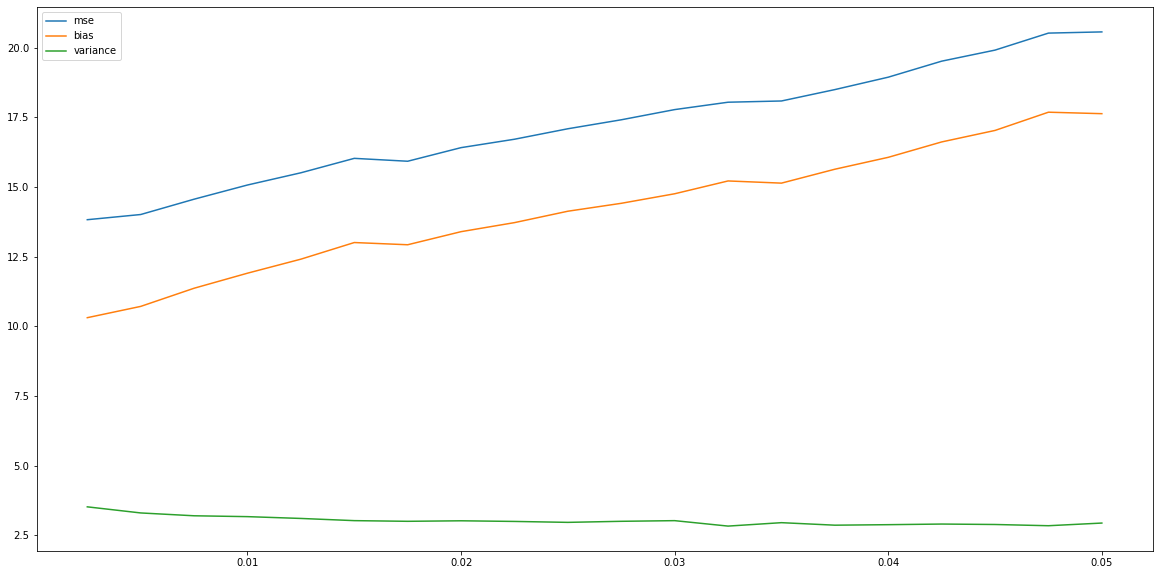

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
df.plot(ax=ax)